In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import pickle
from scipy.sparse import load_npz
import os

In [4]:
data_dir = "/Users/mariiakostenko/Downloads/ML"

In [6]:
data_dir = "/content"
with open(os.path.join(data_dir, "X_tab_train.pkl"), "rb") as f:
    X_tab_train = pickle.load(f)
with open(os.path.join(data_dir, "X_tab_val.pkl"), "rb") as f:
    X_tab_val = pickle.load(f)
with open(os.path.join(data_dir, "X_tab_test.pkl"), "rb") as f:
    X_tab_test = pickle.load(f)

In [7]:
X_text_train = load_npz(os.path.join(data_dir, "X_text_train.npz"))
X_text_val = load_npz(os.path.join(data_dir, "X_text_val.npz"))
X_text_test = load_npz(os.path.join(data_dir, "X_text_test.npz"))

In [8]:
with open(os.path.join(data_dir, "y_train.pkl"), "rb") as f:
    y_train = pickle.load(f)
with open(os.path.join(data_dir, "y_val.pkl"), "rb") as f:
    y_val = pickle.load(f)
with open(os.path.join(data_dir, "y_test.pkl"), "rb") as f:
    y_test = pickle.load(f)

In [9]:
print("Train shape (tabular):", X_tab_train.shape)
print("Train shape (text):", X_text_train.shape)
print("Validation shape (tabular):", X_tab_val.shape)
print("Validation shape (text):", X_text_val.shape)
print("Test shape (tabular):", X_tab_test.shape)
print("Test shape (text):", X_text_test.shape)

Train shape (tabular): (1786, 5)
Train shape (text): (1786, 5000)
Validation shape (tabular): (316, 5)
Validation shape (text): (316, 5000)
Test shape (tabular): (371, 5)
Test shape (text): (371, 5000)


In [10]:
from sklearn.linear_model import LogisticRegression
from scipy.sparse import hstack

# Combine tabular and text features for training and validation
X_train_combined = hstack([X_tab_train, X_text_train])
X_val_combined = hstack([X_tab_val, X_text_val])

# Example: baseline model
clf = LogisticRegression(max_iter=500, random_state=42)
clf.fit(X_train_combined, y_train)

# Validation set predictions
y_pred = clf.predict(X_val_combined)
y_true = y_val  # true labels for validation set

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
# Validation set predictions
y_pred = clf.predict(X_val_combined)
y_true = y_val  # true labels for validation set

F1 macro (primary metric): 0.559
Accuracy: 0.896

Classification Report:
              precision    recall  f1-score   support

         neg       0.86      0.64      0.74        59
         neu       0.00      0.00      0.00         8
         pos       0.90      0.98      0.94       249

    accuracy                           0.90       316
   macro avg       0.59      0.54      0.56       316
weighted avg       0.87      0.90      0.88       316



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


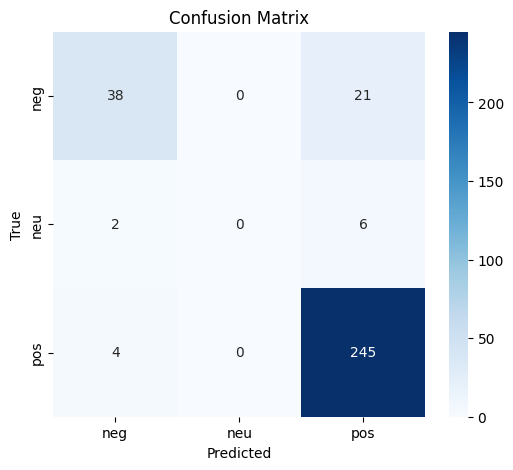

In [12]:
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# y_true = true labels
# y_pred = predictions from your model

# 1. F1 macro (primary metric)
f1_macro = f1_score(y_true, y_pred, average='macro')
print("F1 macro (primary metric):", round(f1_macro,3))

# 2. Accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", round(acc,3))

# 3. Detailed report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["neg","neu","pos"]))

# 4. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["neg","neu","pos"], yticklabels=["neg","neu","pos"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

F1 macro → обчислюється головна метрика для оцінки моделі на всіх класах (primary metric).

Accuracy → допоміжна метрика для загальної точності.

Classification Report → деталізує Precision, Recall та F1 по кожному класу.

Confusion Matrix → наочно показує, де модель помиляється по класах.

**Primary metric (F1 macro): 0.559**

Оскільки ми обираємо макро F1 як головну метрику, вона показує середню якість класифікації по всіх класах (негативні, нейтральні, позитивні) без урахування дисбалансу класів. Значення 0.559 свідчить про середню точність для менш представлених класів (особливо для нейтральних відгуків).

**Accuracy: 0.896**

Висока точність здебільшого обумовлена переважанням позитивних відгуків у валідаційній вибірці. Це підтверджує, що accuracy може бути оманливою метрикою при дисбалансі класів.

Модель добре розпізнає негативні відгуки, але пропускає частину (recall 0.64).

Модель практично не визначає нейтральні відгуки — потрібна робота з балансом класів.

Позитивні відгуки визначаються майже ідеально.

Модель найкраще справляється з позитивними відгуками, прийнятно — з негативними, і практично не розпізнає нейтральні.


**Evaluation strategy:**

Спершу оцінюємо модель на валідаційній вибірці.

Вибираємо найкращу модель за F1 macro.

Потім перевіряємо на тестовій вибірці, щоб отримати остаточні показники.